In [ ]:
import pandas as pd

url = "https://www.data.gouv.fr/fr/datasets/r/ea4f5879-af40-4e3e-949d-812d6eeb5e02"

data = pd.read_csv(url, delimiter=';')

recensement = data[['inst_numero', 'inst_nom', 'dep_nom', 'new_code', 'new_name', 'inst_etat', 
                    'inst_date_creation', 'inst_date_etat', 'inst_date_valid', 'inst_acc_handi_bool', 
                    'inst_trans_bool', 'equip_numero', 'equip_nom', 'equip_type_code', 
                    'equip_type_name', 'equip_type_famille', 'equip_x', 'equip_y', 
                    'equip_etat', 'equip_eclair', 'equip_douche', 'equip_sanit', 
                    'equip_pmr_aire', 'equip_pmr_douche', 'equip_pmr_sanit', 
                    'equip_travaux_date', 'equip_service_date', 'equip_travaux_type', 
                    'equip_energie', 'equip_prop_type', 'dens_lib', 'zrr_simp']]

/tmp/ipykernel_28624/791672305.py:5: DtypeWarning: Columns (4,6,57,69,103,105,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url, delimiter=';')


In [ ]:
print(data.head(10))
n_lignes = data.shape
print(f"Nombre de lignes : {n_lignes}")

  inst_numero                           inst_nom              inst_adresse  \
0  I130190007              PARC CLUB DE L'ARBOIS  Route Départementale 543   
1  I130190007              PARC CLUB DE L'ARBOIS  Route Départementale 543   
2  I130190007              PARC CLUB DE L'ARBOIS  Route Départementale 543   
3  I130190007              PARC CLUB DE L'ARBOIS  Route Départementale 543   
4  I130200003                     STADE MOULLARD            Route du stade   
5  I130210003      COMPLEXE SPORTIF ROGER ARNAUD       QUARTIER DE LA LOGE   
6  I130210006                 STADE ROGER ARNAUD       QUARTIER DE LA LOGE   
7  I130210006                 STADE ROGER ARNAUD       QUARTIER DE LA LOGE   
8  I130210007      TENNIS CLUB DE CARRY LE ROUET       QUARTIER DE LA LOGE   
9  I130210012  MER MEDITERRANEE SITES DE PLONGEE                       NaN   

   inst_cp inst_com_code    inst_com_nom new_code        new_name  inst_actif  \
0  13480.0         13019         Cabriès    13019         Ca

In [8]:
doublons = (recensement
            .groupby(['inst_nom', 'new_code'])
            .size()
            .reset_index(name='n')
            .query('n > 0'))
print(doublons.head)

<bound method NDFrame.head of                                  inst_nom new_code  n
0           "Aire de jeux" Calebassiers 3    97411  1
1                           "Le Sépulcre"  22187.0  2
2           "Le circuit de Saint Mathieu"    29190  1
3       "Le circuit de Saint-Demet" N° 22  29215.0  1
4             "le 107" saut à l'élastique    48094  1
...                                   ...      ... ..
160619                  étang des oiseaux    57255  1
160620                   étang des pelles    25085  1
160621                    étangs de pêche    42293  1
160622                    étape cavalière    69018  3
160623                  étrier de Moselle    57534  4

[160624 rows x 3 columns]>


In [9]:
distinct = recensement.drop_duplicates(subset=['inst_nom', 'new_code'], keep='first')

df_epure = pd.merge(distinct, doublons, on=['inst_nom', 'new_code'], how='outer')

/tmp/ipykernel_28624/2049927570.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Var1', y='Freq', data=freq_table.sort_values('Freq', ascending=False), palette='Oranges')


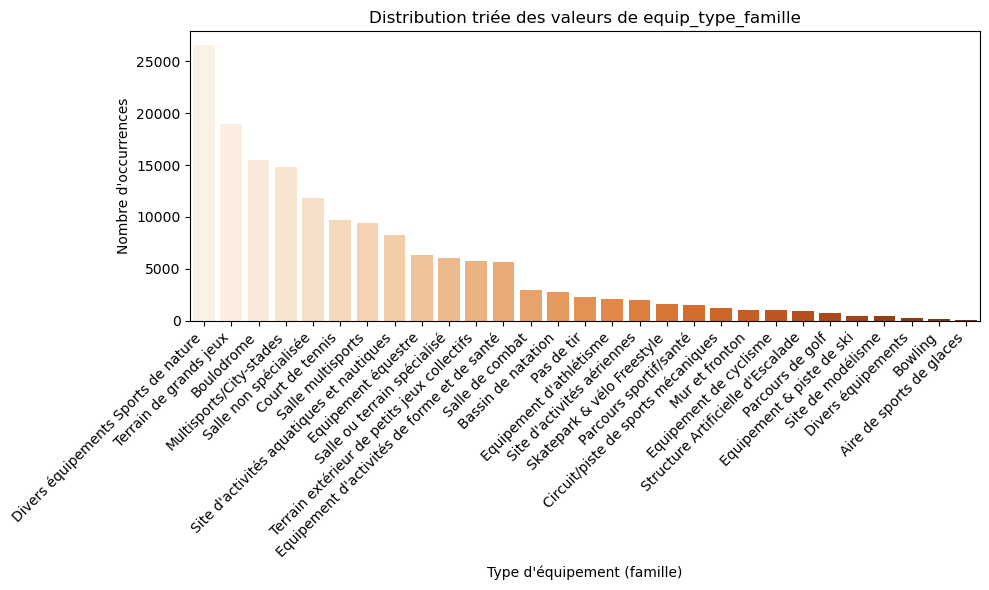

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer une table de fréquences
freq_table = pd.DataFrame(df_epure['equip_type_famille'].value_counts()).reset_index()
freq_table.columns = ['Var1', 'Freq']

# Visualiser avec un barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Var1', y='Freq', data=freq_table.sort_values('Freq', ascending=False), palette='Oranges')
plt.title("Distribution triée des valeurs de equip_type_famille")
plt.xlabel("Type d'équipement (famille)")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

boulodromes_dep = (df_epure[df_epure['equip_type_famille'] == "Boulodrome"]
                   .groupby('dep_nom')
                   .size()
                   .reset_index(name='nombre')
                   .sort_values(by='nombre', ascending=False))

/tmp/ipykernel_28624/3219396892.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dep_nom', y='nombre', data=boulodromes_dep, palette='Blues', edgecolor='black')


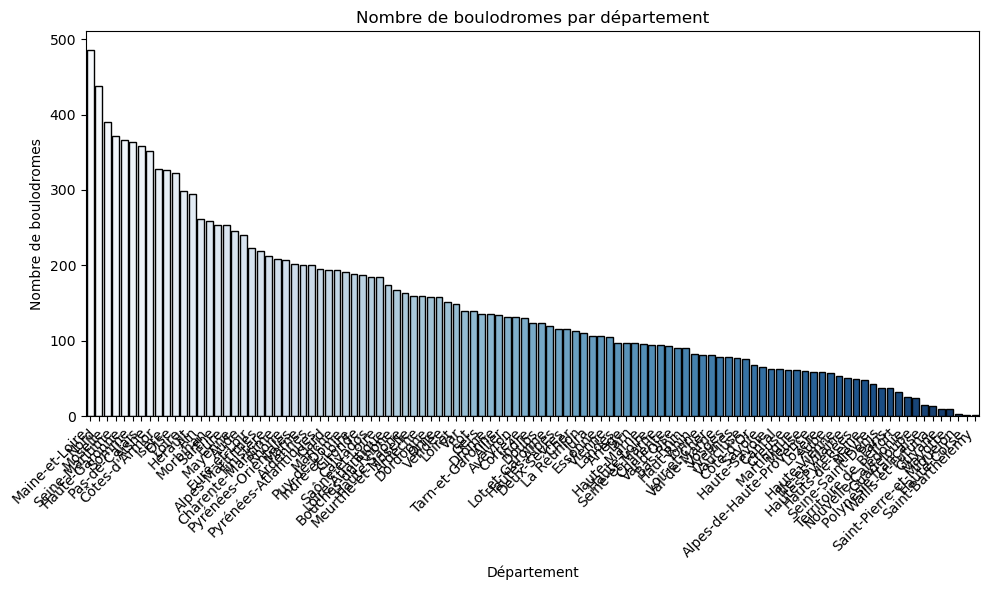

In [12]:
boulodromes_dep = df_epure[df_epure['equip_type_famille'] == "Boulodrome"] \
    .groupby('dep_nom') \
    .size() \
    .reset_index(name='nombre') \
    .sort_values(by='nombre', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='dep_nom', y='nombre', data=boulodromes_dep, palette='Blues', edgecolor='black')
plt.title("Nombre de boulodromes par département")
plt.xlabel("Département")
plt.ylabel("Nombre de boulodromes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [15]:
pip install geopandas pandas matplotlib cartopy rasterio numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 44.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 77.3 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
import geopandas as gpd
from cartopy import crs as ccrs
import rasterio

# Download geographical data using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
france = world[world.name == 'France']

# Crop to metropolitan France
france_metropole = france.cx[-5:10, 41:52]

# Filter points to ensure they are in metropolitan France
df_epure_metropole = df_epure[
    (df_epure['equip_x'] >= -5) & 
    (df_epure['equip_x'] <= 10) & 
    (df_epure['equip_y'] >= 41) & 
    (df_epure['equip_y'] <= 52)
]

# Create the map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the base map of metropolitan France
france_metropole.plot(ax=ax, color='lightblue', edgecolor='gray')

# Plot points with equipment types
scatter = ax.scatter(
    df_epure_metropole['equip_x'],
    df_epure_metropole['equip_y'],
    c=pd.factorize(df_epure_metropole['equip_type_famille'])[0],
    s=0.3,
    alpha=0.3,
    label=df_epure_metropole['equip_type_famille']
)

# Add legend
legend = ax.legend(
    scatter.legend_elements()[0],
    df_epure_metropole['equip_type_famille'].unique(),
    title="Type d'équipement",
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

# Customize the plot
plt.title('Carte de la France Métropolitaine\nCoordonnées des équipements par type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

# Show the plot
plt.show()


AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.